In [2]:
import numpy as np
import pandas as pd
from scipy import stats

# Reading data

In [3]:
city = pd.read_csv('man_city_17_19.csv')

In [4]:
city.head()

,Season,Matchday,Opponent,Minute,Player,Outcome,Distance,BodyPart,Notes,SCA1,SCA1Event,SCA2,SCA2Event
0,2017/18,1,Brighton & Hove Albion,4,Gabriel Jesus,Blocked,11,Right Foot,NaN,Fernandinho,Pass (Live),Kyle Walker,Pass (Live)
1,2017/18,1,Brighton & Hove Albion,9,Danilo,Off Target,21,Right Foot,NaN,David Silva,Pass (Live),Danilo,Pass (Live)
2,2017/18,1,Brighton & Hove Albion,14,Fernandinho,Off Target,10,Head,NaN,David Silva,Pass (Dead),NaN,NaN
3,2017/18,1,Brighton & Hove Albion,17,Kevin De Bruyne,Saved,27,Right Foot,Free kick,David Silva,Fouled,Fernandinho,Pass (Live)
4,2017/18,1,Brighton & Hove Albion,32,Kevin De Bruyne,Blocked,28,Right Foot,Free kick,David Silva,Fouled,Danilo,Pass (Live)


In [5]:
print(city.Season.value_counts())
print(city.Matchday.nunique())

2019/20    376
2017/18    338
Name: Season, dtype: int64
19


Data only for two halves of two seasons. Getting shots per searson.

In [6]:
y17 = city.query("Season == '2017/18'")['Distance']

In [7]:
y19 = city.query("Season == '2019/20'")['Distance']

In [8]:
from matplotlib import pyplot as plt
plt.style.use('Solarize_Light2')
plt.style.use('seaborn-poster')
import seaborn as sns

# Comparing two samples

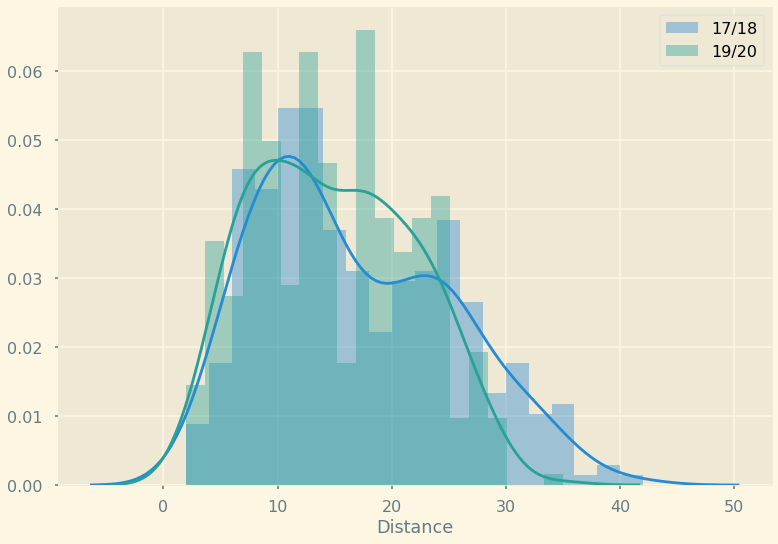

In [9]:
sns.distplot(y17, 20, label='17/18')
sns.distplot(y19, 20, label='19/20')
plt.legend()

In [10]:
y17.mean(), y17.std()

(16.701183431952664, 8.510914536706341)

In [11]:
y19.mean(), y19.std()

(14.872340425531915, 6.962733627998998)

In [12]:
# equal_var=False to perform welch's test instead, because of different variance and amount of sample
stats.ttest_ind(y17,y19, equal_var=False)

Ttest_indResult(statistic=3.1215926762079387, pvalue=0.0018782472078475076)

Looks like there is a high chance of difference between them.

# Density distribution

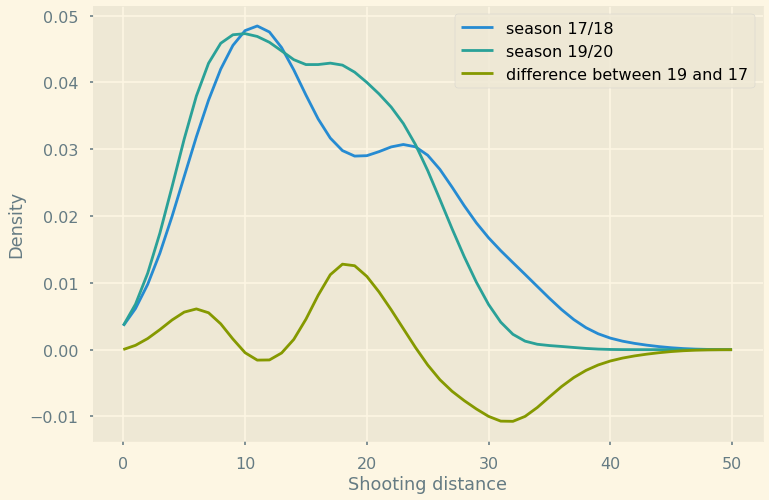

In [13]:
kde17 = stats.gaussian_kde(y17)
kde19 = stats.gaussian_kde(y19)
grid = np.linspace(0,50, 51)
plot = plt.figure(figsize=(12,8))
plt.plot(grid, kde17(grid), label="season 17/18", figure=plot)
plt.plot(grid, kde19(grid), label="season 19/20")
plt.plot(grid, kde19(grid)-kde17(grid), label="difference between 19 and 17")
plt.xlabel('Shooting distance')
plt.ylabel('Density')
plt.legend()
plt.show()

You can see the difference after plotting estimated densities. 

Manchester City has started shooting more from the 5-10 and 15-20 yards range. They shoot less from > 30 yards.

Text(0.5, 1.0, 'a-b')

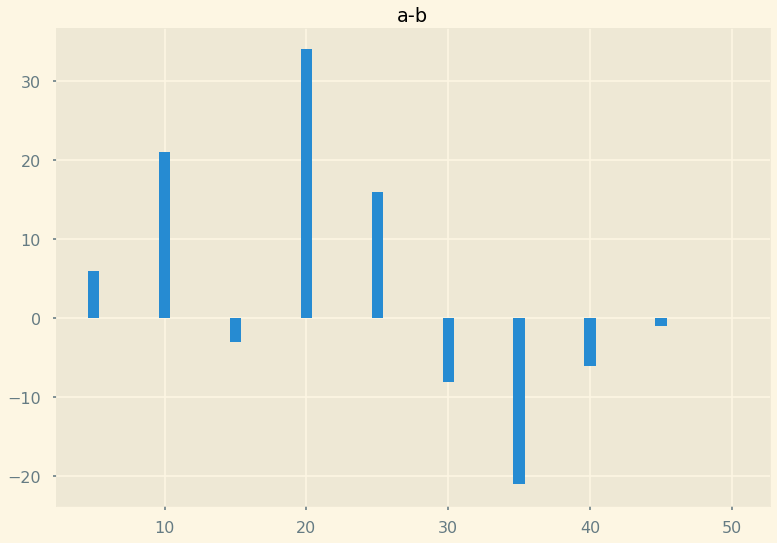

In [14]:
 diff=plt.bar(range(5,51,5), 
             height=(np.histogram(y19,bins=10, range=(0,50))[0] - np.histogram(y17,bins=10, range=(0,50))[0])
             ) 
 plt.title("a-b")

Here is the difference between histograms.